In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(f1, f2, X, target, padding=1, marker='o'):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()
    markers = f'r{marker}', f'b{marker}'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], markers[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, f1(line_x))
    plt.plot(line_x, f2(line_x))
    plt.show()

In [4]:
def percep_step(input, th=0):
    return 1 if input > th else -1 if input < -th else 0

In [5]:
def percep_fit(X, target, th=0, a=1, max_epoch=-1, verbose=False, draw=False):
    w = np.zeros(len(X[0]) + 1)
    bias = np.ones((len(X), 1))
    X = np.hstack((bias, X))
    stop = False
    epoch = 0

    while not stop and (max_epoch == -1 or epoch < max_epoch):
        stop = True
        epoch += 1

        if verbose:
            print('\nEpoch', epoch)

        for r, row in enumerate(X):
            y_in = np.dot(row, w)
            y = percep_step(y_in, th)

            if y != target[r]:
                stop = False

                w = [w[i] + a * target[r] * row[i] for i in range(len(row))]

            if verbose:
                print('Bobot:', w)

            if draw:
                plot(line(w, th), line(w, -th), X, target)

    return w, epoch

In [6]:
def percep_predict(X, w, th=0):
    Y = []

    for x in X:
        y_in = w[0] + np.dot(x, w[1:])
        y = percep_step(y_in, th)

        Y.append(y)

    return Y

In [7]:
def calc_accuracy(a, b):
    s = [1 if a[i] == b[i] else 0 for i in range(len(a))]

    return sum(s) / len(a)


Epoch 1
Bobot: [0.1, 0.1, 0.1]


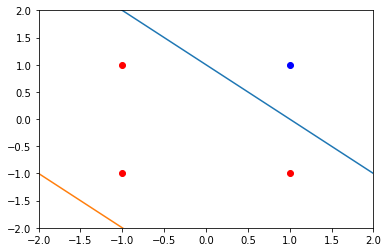

Bobot: [0.0, 0.0, 0.2]


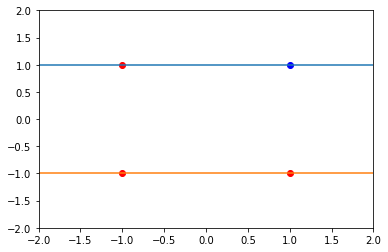

Bobot: [-0.1, 0.1, 0.1]


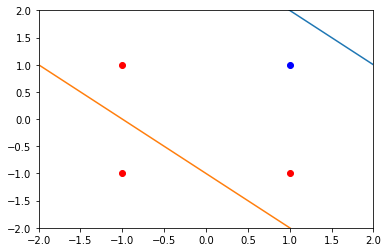

Bobot: [-0.1, 0.1, 0.1]


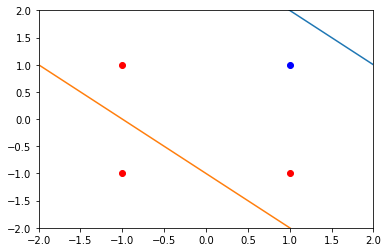


Epoch 2
Bobot: [0.0, 0.2, 0.2]


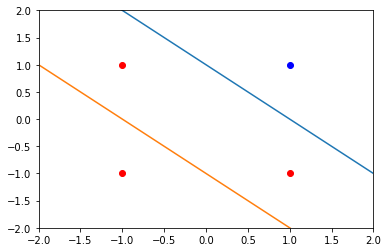

Bobot: [-0.1, 0.1, 0.30000000000000004]


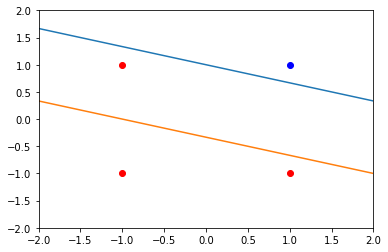

Bobot: [-0.2, 0.2, 0.20000000000000004]


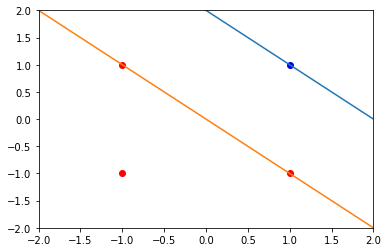

Bobot: [-0.2, 0.2, 0.20000000000000004]


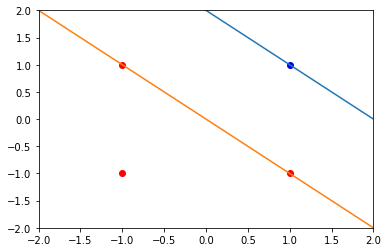


Epoch 3
Bobot: [-0.2, 0.2, 0.20000000000000004]


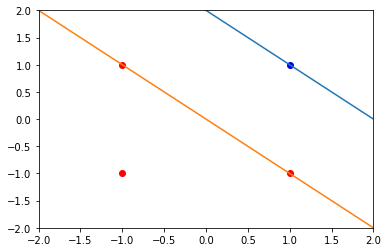

Bobot: [-0.2, 0.2, 0.20000000000000004]


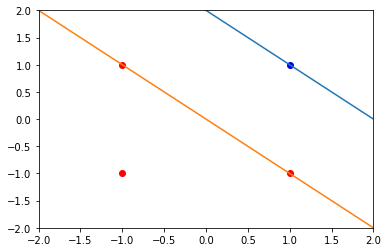

Bobot: [-0.30000000000000004, 0.30000000000000004, 0.10000000000000003]


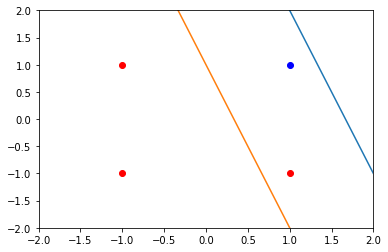

Bobot: [-0.30000000000000004, 0.30000000000000004, 0.10000000000000003]


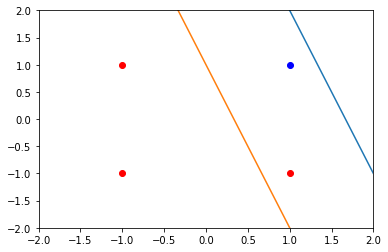


Epoch 4
Bobot: [-0.20000000000000004, 0.4, 0.20000000000000004]


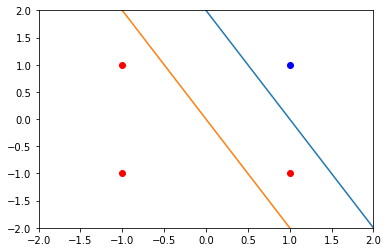

Bobot: [-0.30000000000000004, 0.30000000000000004, 0.30000000000000004]


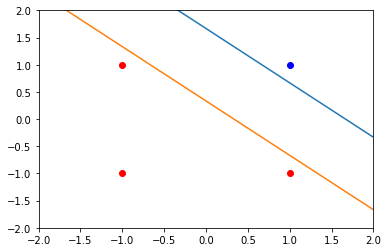

Bobot: [-0.30000000000000004, 0.30000000000000004, 0.30000000000000004]


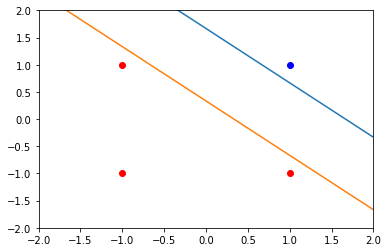

Bobot: [-0.30000000000000004, 0.30000000000000004, 0.30000000000000004]


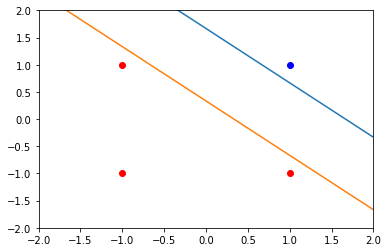


Epoch 5
Bobot: [-0.30000000000000004, 0.30000000000000004, 0.30000000000000004]


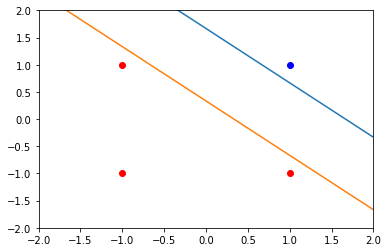

Bobot: [-0.30000000000000004, 0.30000000000000004, 0.30000000000000004]


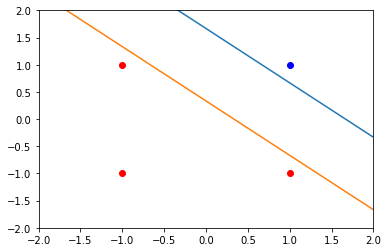

Bobot: [-0.30000000000000004, 0.30000000000000004, 0.30000000000000004]


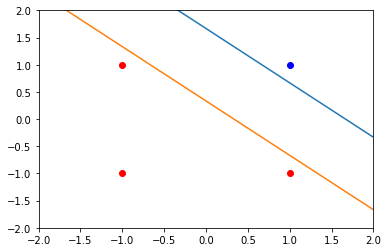

Bobot: [-0.30000000000000004, 0.30000000000000004, 0.30000000000000004]


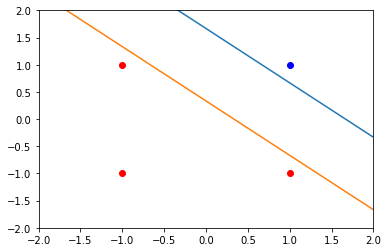

Epochs: 5
Output: [1, -1, -1, -1]
Target: (1, -1, -1, -1)
Accuracy: 1.0


In [13]:
# AND
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, -1, -1, -1
th = .2
model, epoch = percep_fit(train, target, th, verbose=True, draw=True)
output = percep_predict(train, model)
accuracy = calc_accuracy(output, target)

print('Epochs:', epoch)
print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)


Epoch 1
Bobot: [1.0, 1.0, 1.0]


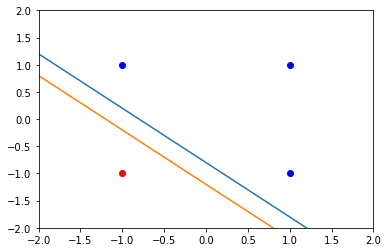

Bobot: [1.0, 1.0, 1.0]


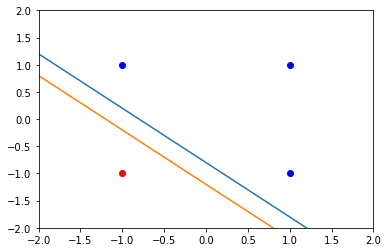

Bobot: [1.0, 1.0, 1.0]


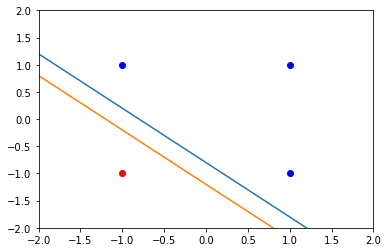

Bobot: [1.0, 1.0, 1.0]


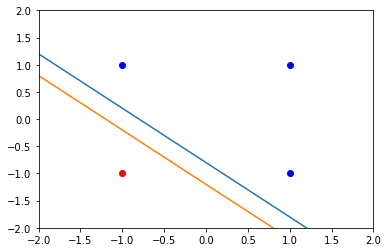


Epoch 2
Bobot: [1.0, 1.0, 1.0]


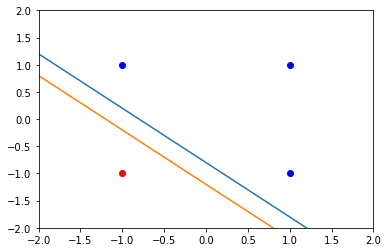

Bobot: [1.0, 1.0, 1.0]


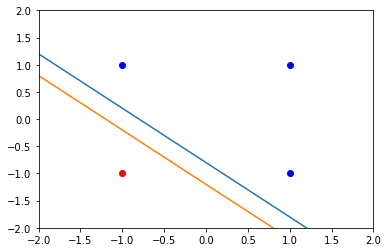

Bobot: [1.0, 1.0, 1.0]


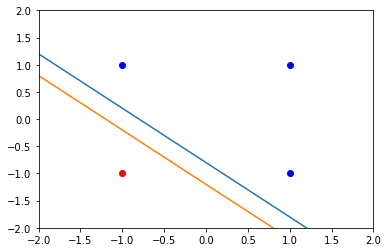

Bobot: [1.0, 1.0, 1.0]


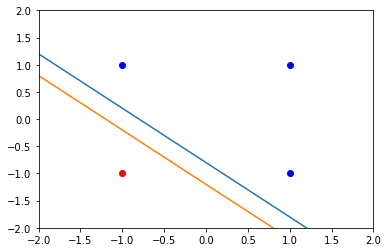

Epochs: 2
Output: [1, 1, 1, -1]
Target: (1, 1, 1, -1)
Accuracy: 1.0


In [9]:
# OR
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, 1, 1, -1
th = .2
model, epoch = percep_fit(train, target, th, verbose=True, draw=True)
output = percep_predict(train, model)
accuracy = calc_accuracy(output, target)

print('Epochs:', epoch)
print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)


Epoch 1
Bobot: [-1.0, -1.0, -1.0]


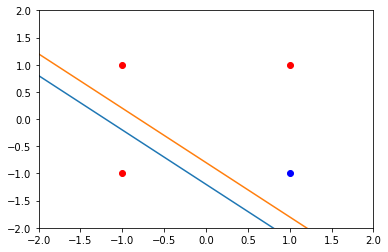

Bobot: [0.0, 0.0, -2.0]


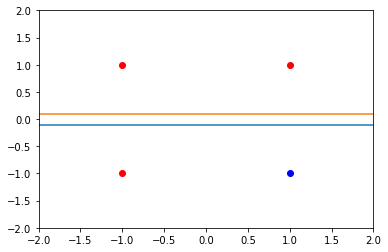

Bobot: [0.0, 0.0, -2.0]


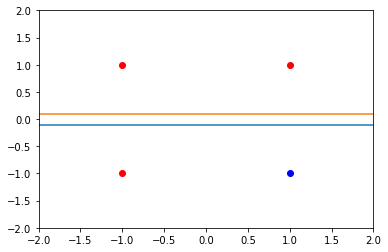

Bobot: [-1.0, 1.0, -1.0]


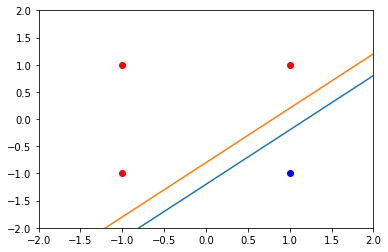


Epoch 2
Bobot: [-1.0, 1.0, -1.0]


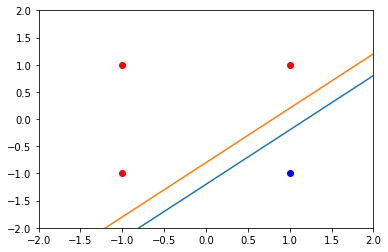

Bobot: [-1.0, 1.0, -1.0]


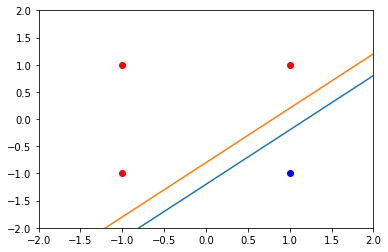

Bobot: [-1.0, 1.0, -1.0]


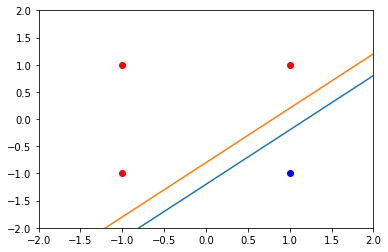

Bobot: [-1.0, 1.0, -1.0]


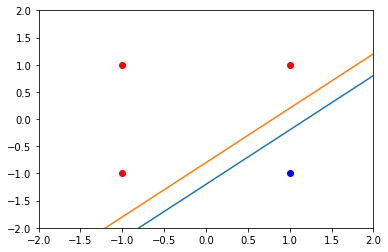

Epochs: 2
Output: [-1, 1, -1, -1]
Target: (-1, 1, -1, -1)
Accuracy: 1.0


In [10]:
# AND NOT
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = -1, 1, -1, -1
th = .2
model, epoch = percep_fit(train, target, th, verbose=True, draw=True)
output = percep_predict(train, model)
accuracy = calc_accuracy(output, target)

print('Epochs:', epoch)
print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

In [12]:
# XOR
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = -1, 1, 1, -1
th = .2
model, epoch = percep_fit(train, target, th, max_epoch=50, verbose=True, draw=False)
output = percep_predict(train, model)
accuracy = calc_accuracy(output, target)

print('Epochs:', epoch)
print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)
# accuracy = accuracy_score(output, target)

# print('Output:', output)
# print('Accuracy:', accuracy)


Epoch 1
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 2
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 3
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 4
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 5
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 6
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 7
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 8
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 9
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 10
Bobot: [-1.0, -1.0, -1.0]
B